# Сокращение размерности

В каждом из заданий:
* Обучите два классификатора (svm и огистическую регрессию на датасете данном ниже) в датасете размерность из 30 признаков
* Попребирайте различное количество итоговых размерностей и постройте графики качества от количества размерностей. Выведите обе модели на одном графике в каждой заадче

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import decomposition, datasets
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
np.random.seed(5)
dataset = datasets.load_breast_cancer()
X = dataset.data
y = dataset.target
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
import warnings
warnings.filterwarnings('ignore')
def evaluate_models(X_reduced, y):
    svm_clf = svm.SVC(kernel='linear', random_state=42)
    lr_clf = LogisticRegression(max_iter=10000, random_state=42)
    svm_scores = cross_val_score(svm_clf, X_reduced, y, cv=5, scoring='accuracy')
    lr_scores = cross_val_score(lr_clf, X_reduced, y, cv=5, scoring='accuracy')
    return np.mean(svm_scores), np.mean(lr_scores)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Forward selection (2pts)

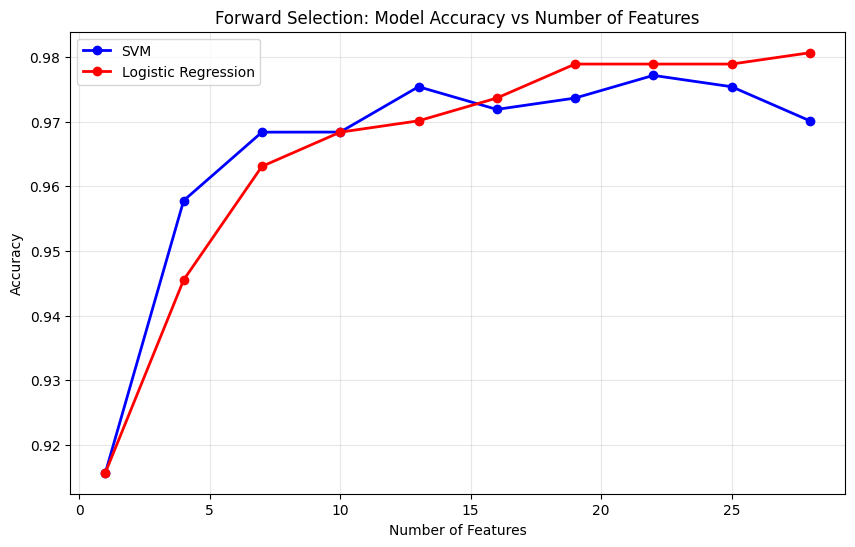

In [16]:
n_features_range = range(1, 31, 3)
forward_svm_scores = []
forward_lr_scores = []
for n_features in n_features_range:
    svm_clf = svm.SVC(kernel='linear', random_state=42)
    selector_svm = RFE(svm_clf, n_features_to_select=n_features, step=2)
    X_selected_svm = selector_svm.fit_transform(X_scaled, y)
    lr_clf = LogisticRegression(max_iter=10000, random_state=42)
    selector_lr = RFE(lr_clf, n_features_to_select=n_features, step=2)
    X_selected_lr = selector_lr.fit_transform(X_scaled, y)
    svm_score, _ = evaluate_models(X_selected_svm, y)
    _, lr_score = evaluate_models(X_selected_lr, y)
    forward_svm_scores.append(svm_score)
    forward_lr_scores.append(lr_score)
plt.figure(figsize=(10, 6))
plt.plot(n_features_range, forward_svm_scores, 'bo-', label='SVM', linewidth=2)
plt.plot(n_features_range, forward_lr_scores, 'ro-', label='Logistic Regression', linewidth=2)
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('Forward Selection: Model Accuracy vs Number of Features')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Backward elimination (2pts)

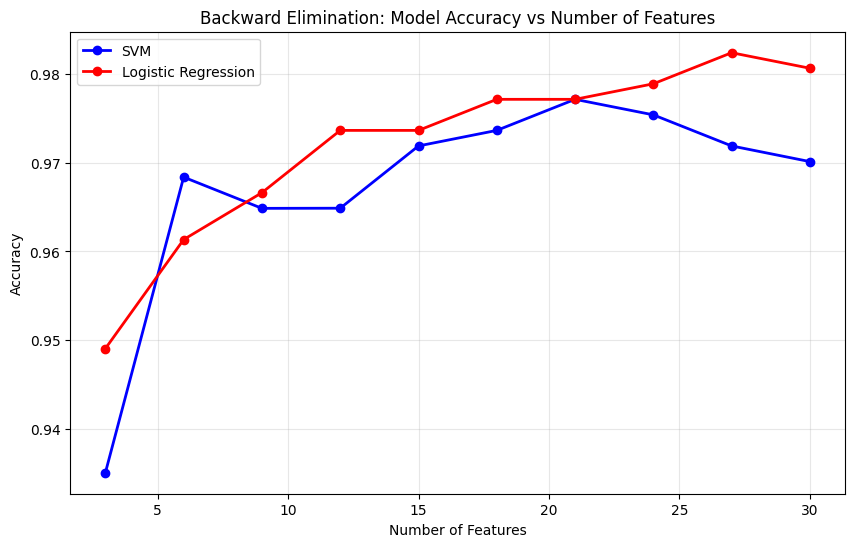

In [17]:
backward_svm_scores = []
backward_lr_scores = []
n_features_range_backward = range(30, 0, -3)
for n_features in n_features_range_backward:
    svm_clf = svm.SVC(kernel='linear', random_state=42)
    selector_svm = RFE(svm_clf, n_features_to_select=n_features, step=2)
    X_selected_svm = selector_svm.fit_transform(X_scaled, y)
    lr_clf = LogisticRegression(max_iter=10000, random_state=42)
    selector_lr = RFE(lr_clf, n_features_to_select=n_features, step=2)
    X_selected_lr = selector_lr.fit_transform(X_scaled, y)
    svm_score, _ = evaluate_models(X_selected_svm, y)
    _, lr_score = evaluate_models(X_selected_lr, y)
    backward_svm_scores.append(svm_score)
    backward_lr_scores.append(lr_score)
plt.figure(figsize=(10, 6))
n_features_list = list(n_features_range_backward)
plt.plot(n_features_list, backward_svm_scores, 'bo-', label='SVM', linewidth=2)
plt.plot(n_features_list, backward_lr_scores, 'ro-', label='Logistic Regression', linewidth=2)
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('Backward Elimination: Model Accuracy vs Number of Features')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# PCA (2 pts)


### EM алгоритм

Оставлю это тут просто чтобы пугать людей


$$
\log p(x|\theta) = \int q(z)\log p(x|\theta)dz = \int q(z)\log\dfrac{p(x,z|\theta)}{p(z|x,\theta)}dz = \int q(z)\log\dfrac{p(x,z|\theta)}{q(z)}dz+\int q(z)\log\dfrac{q(z)}{p(z|x,\theta)}dz = \mathcal{L}(q,\theta)+KL(q(z)|p(z|x,\theta))
$$

** E-step **
$$ q(z)^{(n+1)} = p(z|x,\theta^{(n)}) $$
** M-step **
$$ \theta^{(n+1)} = \max\limits_{\theta} \mathcal{L}(q^{(n+1)},\theta) $$

Обучите два классификатора (svm и огистическую регрессию на датасете данном ниже) в датасете размерность из 30 признаков. Попребирайте различное количество итоговых размерностей (до которых будет сокращать PCA) и постройте графики для обоих классификаторов. Сделайте выводы.

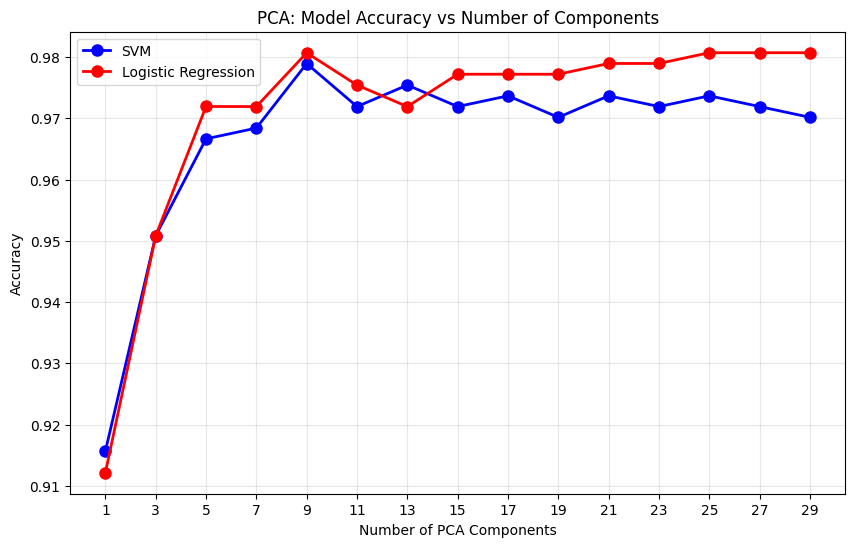

In [18]:
n_components_range = range(1, 31, 2)
pca_svm_scores = []
pca_lr_scores = []
for n_comp in n_components_range:
    pca = decomposition.PCA(n_components=n_comp)
    X_pca = pca.fit_transform(X_scaled)
    svm_score, lr_score = evaluate_models(X_pca, y)
    pca_svm_scores.append(svm_score)
    pca_lr_scores.append(lr_score)
plt.figure(figsize=(10, 6))
plt.plot(n_components_range, pca_svm_scores, 'bo-', label='SVM', linewidth=2, markersize=8)
plt.plot(n_components_range, pca_lr_scores, 'ro-', label='Logistic Regression', linewidth=2, markersize=8)
plt.xlabel('Number of PCA Components')
plt.ylabel('Accuracy')
plt.title('PCA: Model Accuracy vs Number of Components')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(n_components_range)
plt.show()

#  Выводы (1pts)